<a href="https://colab.research.google.com/github/kshitizs11/GAN-Generative-adversarial-network-/blob/main/Cartoon_Faces_(GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://www.dropbox.com/s/0mhnn7f543fv1mp/cartoonset10k.tgz?dl=0"

--2020-08-27 03:34:07--  https://www.dropbox.com/s/0mhnn7f543fv1mp/cartoonset10k.tgz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0mhnn7f543fv1mp/cartoonset10k.tgz [following]
--2020-08-27 03:34:07--  https://www.dropbox.com/s/raw/0mhnn7f543fv1mp/cartoonset10k.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9dfa88e5f1da265a7d99824f73.dl.dropboxusercontent.com/cd/0/inline/A-PlMP9lt8Je6A1FEGskk6SaeFdcqD7bxx0s9m3I6jJFfW9Ukhz-QhF_n6MW_Ikuy3RsHJ39JgX2VT91IOlnCU8a29FRq17wPwQP5eUCZAIiYkCKuzAgVZB54W81D3zEets/file# [following]
--2020-08-27 03:34:07--  https://uc9dfa88e5f1da265a7d99824f73.dl.dropboxusercontent.com/cd/0/inline/A-PlMP9lt8Je6A1FEGskk6SaeFdcqD7bxx0s9m3I6jJFfW9Ukhz-QhF_n6MW_Ikuy3RsHJ39JgX2VT91IOlnCU8a29FRq1

In [ ]:
# !mkdir images

In [ ]:
import tarfile
with tarfile.open('cartoonset10k.tgz?dl=0') as tar:
    tar.extractall()

In [ ]:
import os 
folders = os.listdir('cartoonset10k')

In [ ]:
from keras.preprocessing import image
import numpy as np

In [ ]:
x = []
for folder in os.listdir("cartoonset10k"):
  if folder.split(".")[1] == "png":
    # print(folder)
    im = image.load_img(os.path.join("cartoonset10k/",folder),target_size=(100,100))
    im = np.array(im)
    x.append(im)

In [ ]:
x_main = np.array(x)
x_main.shape

(10000, 100, 100, 3)

In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical

import numpy as np

from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU,ReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
print(np.min(x_main))
print(np.max(x_main))

0
255


In [ ]:
x_main = (x_main.astype("float32")-127.5)/127.5


print(np.min(x_main))
print(np.max(x_main))

-1.0
1.0


In [ ]:
total_epochs = 50
batch_size = 64
no_of_batches = math.ceil(x_main.shape[0]/float(batch_size))
half_batch = int(batch_size/2)
noise_dim = 100

In [ ]:
adam = Adam(lr = 2e-4,beta_1 = 0.1)

# G for D

In [ ]:
#500 -> (100,100,3)

generator =Sequential()
generator.add(Dense(25*25*128,input_shape=(noise_dim,)))
generator.add(Reshape((25,25,128)))
generator.add(ReLU(0.2))
generator.add(BatchNormalization())

#25,25,128 ->50,50,64
# generator.add(UpSampling2D())
# generator.add(Conv2D(64,kernel_size=(5,5),padding="same"))
generator.add(Conv2DTranspose(64,kernel_size=(5,5),strides=(2,2),padding="same"))
generator.add(ReLU(0.2))
generator.add(BatchNormalization())


# generator.add(Conv2DTranspose(128,kernel_size=(5,5),strides=(2,2),padding="same"))
# generator.add(ReLU(0.2))
# generator.add(BatchNormalization())


# generator.add(Conv2DTranspose(128,kernel_size=(5,5),strides=(2,2),padding="same"))
# generator.add(ReLU(0.2))
# generator.add(BatchNormalization())

#56,56,128 -> 112,112,64
# generator.add(UpSampling2D())
# generator.add(Conv2D(64,kernel_size=(5,5),padding="same"))
# generator.add(LeakyReLU(0.2))
# generator.add(BatchNormalization())


#50,50,64 -> 100,100,3
generator.add(Conv2DTranspose(3,kernel_size=(5,5),strides=(2,2),padding="same",activation="tanh"))
# generator.add(UpSampling2D())
# generator.add(Conv2D(3,kernel_size=(3,3),padding="same",activation="tanh"))

generator.compile(loss="binary_crossentropy", optimizer = adam)
generator.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 80000)             8080000   
_________________________________________________________________
reshape_4 (Reshape)          (None, 25, 25, 128)       0         
_________________________________________________________________
re_lu_9 (ReLU)               (None, 25, 25, 128)       0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 25, 25, 128)       512       
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 50, 50, 64)        204864    
_________________________________________________________________
re_lu_10 (ReLU)              (None, 50, 50, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 50, 50, 64)       

# D For D

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(32,(5,5),strides=(2,2),padding="same",input_shape=(100,100,3)))
discriminator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding="same"))
discriminator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

discriminator.add(Flatten())
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer=adam)
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 50, 50, 32)        2432      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 40001     
Total params: 93,697
Trainable params: 93,697
Non-trainable params: 0
__________________________________________________

# G For G

In [ ]:
discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

model = Model(gan_input,gan_output)

model.compile(loss='binary_crossentropy',optimizer=adam)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 100, 100, 3)       8290459   
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 93697     
Total params: 8,384,156
Trainable params: 8,290,063
Non-trainable params: 94,093
_________________________________________________________________


In [ ]:
def display_images(samples = 100):
    noise = np.random.normal(0,1, size = (samples, noise_dim))
    
    generated_img = generator.predict(noise)
    
    
    plt.figure(figsize=(10,10))
    
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_img[i].reshape(100,100,3),interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.show()

# Main Loop

Epoch 1 Disc loss 0.3177713447837693, Generator Loss 8.302957456558943
Epoch 2 Disc loss 0.3053325566042001, Generator Loss 8.703202195465565
Epoch 3 Disc loss 0.31902838631230557, Generator Loss 8.778737615793943
Epoch 4 Disc loss 0.29080300406807924, Generator Loss 8.823108110576868
Epoch 5 Disc loss 0.29153966557258254, Generator Loss 9.25641506537795


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

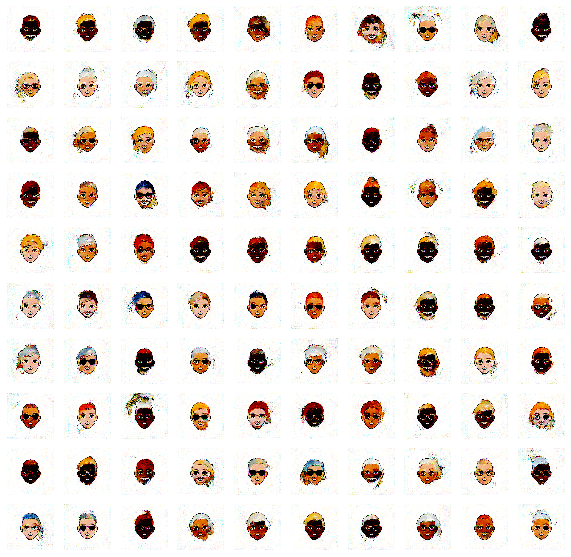

Epoch 6 Disc loss 0.35530121974457224, Generator Loss 9.006225500255823
Epoch 7 Disc loss 0.27773783613399716, Generator Loss 9.320545170456171
Epoch 8 Disc loss 0.3058003523286171, Generator Loss 9.323428623378277
Epoch 9 Disc loss 0.27858179788087395, Generator Loss 9.441115397959948
Epoch 10 Disc loss 0.31888853394349287, Generator Loss 9.476550087332726


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

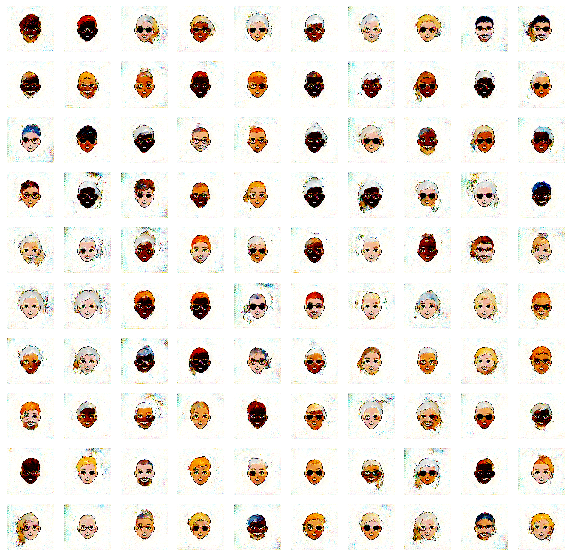

Epoch 11 Disc loss 0.2536468319238941, Generator Loss 9.581748183816671
Epoch 12 Disc loss 0.33622629713314545, Generator Loss 9.571220014244318
Epoch 13 Disc loss 0.2631949667112937, Generator Loss 9.472050502896309
Epoch 14 Disc loss 0.32206773181345055, Generator Loss 9.48047025501728
Epoch 15 Disc loss 0.2814401557378376, Generator Loss 9.79948291927576


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

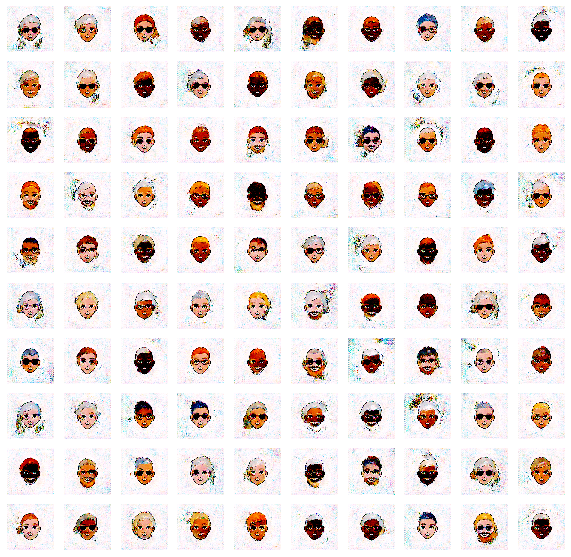

Epoch 16 Disc loss 0.2627900106725609, Generator Loss 9.580378115177155
Epoch 17 Disc loss 0.25657015604672917, Generator Loss 9.737958528101444
Epoch 18 Disc loss 0.3086584849271235, Generator Loss 9.594547417014837
Epoch 19 Disc loss 0.3007371375266059, Generator Loss 10.011574015021324
Epoch 20 Disc loss 0.30470796587289706, Generator Loss 9.43180986866355


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

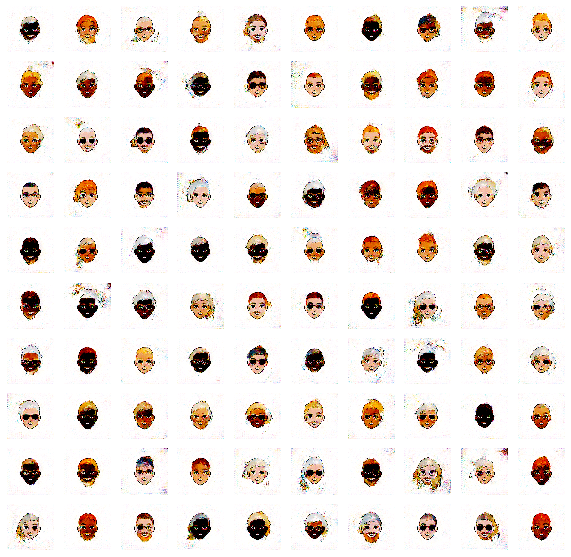

Epoch 21 Disc loss 0.23523615014733404, Generator Loss 9.639510031789541
Epoch 22 Disc loss 0.2536340729647856, Generator Loss 10.062644060701132
Epoch 23 Disc loss 0.29290449036178506, Generator Loss 9.690011356025934
Epoch 24 Disc loss 0.35176690939552846, Generator Loss 10.106322724372149
Epoch 25 Disc loss 0.2596530268550109, Generator Loss 9.39722190797329


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

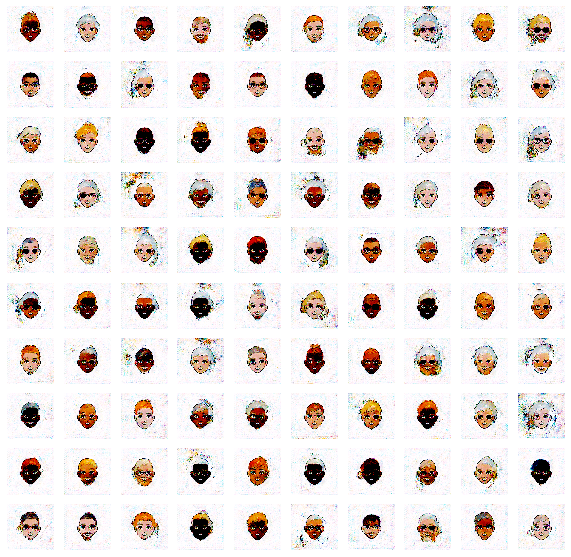

Epoch 26 Disc loss 0.2512327449153041, Generator Loss 9.917247492820024
Epoch 27 Disc loss 0.30980648153764045, Generator Loss 9.862657837569714
Epoch 28 Disc loss 0.22572316383575178, Generator Loss 9.615181770175695
Epoch 29 Disc loss 0.2868778705596924, Generator Loss 10.08881625905633
Epoch 30 Disc loss 0.33522415253078675, Generator Loss 9.801880165934563


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

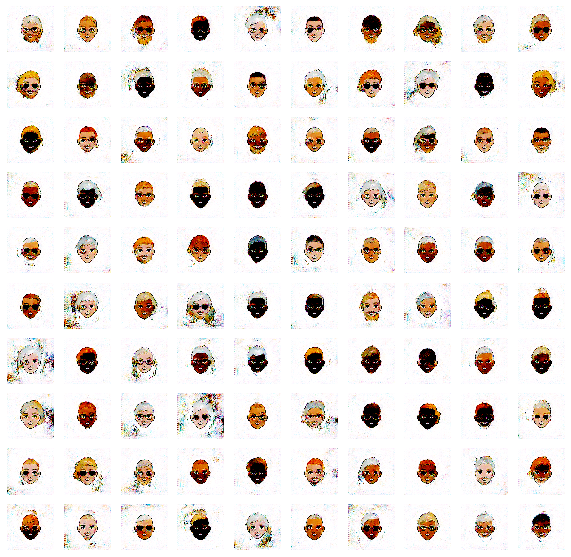

Epoch 31 Disc loss 0.23449282269260496, Generator Loss 9.87941886484623
Epoch 32 Disc loss 0.3004991390570334, Generator Loss 9.887957472354174
Epoch 33 Disc loss 0.24938476427345518, Generator Loss 9.863940082490444
Epoch 34 Disc loss 0.2648545898805568, Generator Loss 10.024859756231308
Epoch 35 Disc loss 0.291793609933726, Generator Loss 9.926755800843239


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

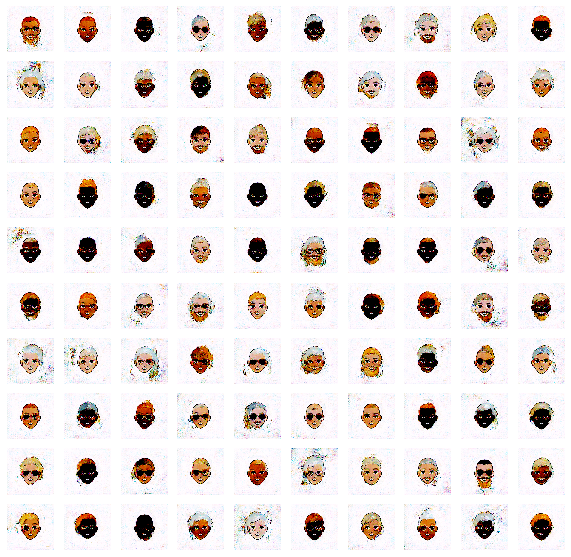

Epoch 36 Disc loss 0.23831800593264924, Generator Loss 9.955740243196487
Epoch 37 Disc loss 0.26846704221550066, Generator Loss 10.020120095461607
Epoch 38 Disc loss 0.27538805157776663, Generator Loss 9.870253045111895
Epoch 39 Disc loss 0.24710818608499066, Generator Loss 10.107849016785622
Epoch 40 Disc loss 0.27687028112115375, Generator Loss 10.003697741776705


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

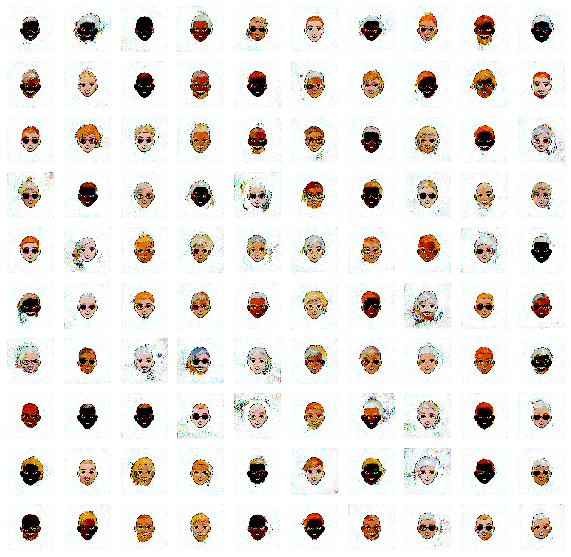

Epoch 41 Disc loss 0.2721468210042377, Generator Loss 10.195793509483337
Epoch 42 Disc loss 0.26526148600658034, Generator Loss 10.070027630776167
Epoch 43 Disc loss 0.27814002026904633, Generator Loss 10.205377731472254
Epoch 44 Disc loss 0.24681695971851517, Generator Loss 9.981231957674026
Epoch 45 Disc loss 0.31699064038515945, Generator Loss 10.224939547479153


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

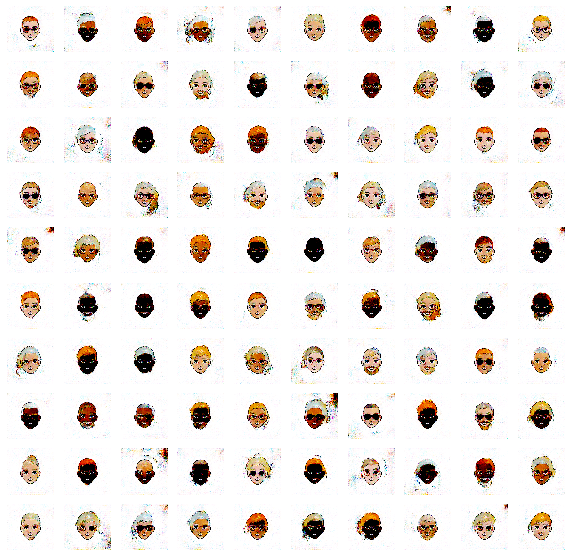

Epoch 46 Disc loss 0.23599766169312844, Generator Loss 9.818407963961363
Epoch 47 Disc loss 0.2723217461151397, Generator Loss 10.26119552925229
Epoch 48 Disc loss 0.2501358320717077, Generator Loss 10.115530297160149
Epoch 49 Disc loss 0.27645910830847964, Generator Loss 10.3046171143651
Epoch 50 Disc loss 0.305181989671698, Generator Loss 9.965941742062569


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

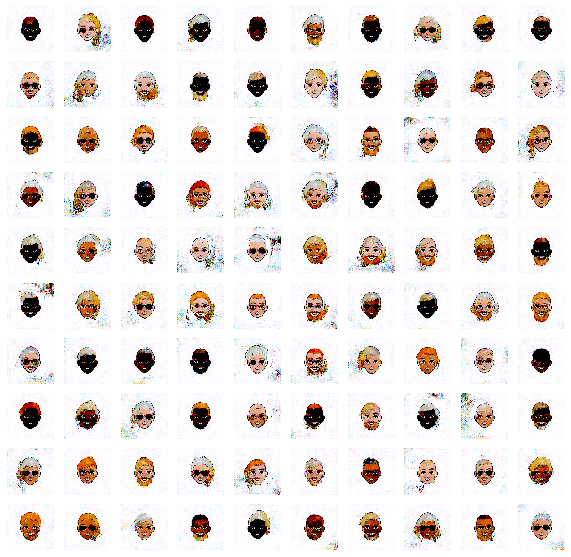

In [ ]:
d_losses = []
g_losses = []

for epochs in range(total_epochs):
  epoch_d_loss = 0.0
  epoch_g_loss = 0.0

  #Mini Batch Gradient Descent
  for step in range(no_of_batches):
    idx = np.random.randint(0,x_main.shape[0],half_batch)
    real_imgs = x_main[idx]

    noise = np.random.normal(0,1,size = (half_batch,noise_dim))
    fake_images = generator.predict(noise)

    real_y = np.ones((half_batch,1))*0.9
    fake_y = np.zeros((half_batch,1))

    d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_y)
        
    d_loss= 0.5*d_loss_real + 0.5*d_loss_fake
        
    epoch_d_loss += d_loss

    # model(Generator) Training
    noise = np.random.normal(0,1,size=(batch_size,noise_dim))
    ground_truth_y = np.ones((batch_size,1))
    g_loss = model.train_on_batch(noise, ground_truth_y)
    epoch_g_loss += g_loss

  print("Epoch {} Disc loss {}, Generator Loss {}".format((epochs+1), epoch_d_loss/no_of_batches, epoch_g_loss/batch_size))
  d_losses.append(epoch_d_loss/no_of_batches)
  g_losses.append(epoch_g_loss/no_of_batches)
    
  if(epochs+1)%5==0:
    generator.save("model.h5")
    display_images()